In [72]:
# Бизнес-задача:
# Компания, занимающаяся разведением и продажей абалонов (включая их жемчуг), хочет оптимизировать процесс выращивания, чтобы максимизировать прибыль.
# Один из ключевых факторов, влияющих на стоимость абалона, - это количество колец (Rings), которое коррелирует с возрастом и, соответственно,
# с размером и качеством жемчуга. Однако, выращивание абалонов до определенного возраста требует времени и ресурсов.
# Компания хочет создать модель машинного обучения, которая предсказывала бы количество колец (Rings) абалона на основе его физических
# характеристик (размеры, вес), чтобы эффективно оценивать потенциальную ценность каждого отдельного экземпляра и принимать решения о его
# дальнейшей судьбе (продажа, дальнейшее выращивание, переработка).

# Цель:
# Разработка модели регрессии, предсказывающей количество колец (Rings) абалона на основе имеющихся данных.
# Точность предсказания критична, так как она напрямую влияет на принимаемые бизнес-решения и, следовательно, на прибыль.

# Почему эта задача важна для бизнеса:
# Оптимизация сроков выращивания: Точная модель позволит определить, когда абалон достигнет оптимального возраста (количества колец)
# для продажи, минимизируя затраты на выращивание.

# Оценка ценности: Модель позволит быстро оценить потенциальную ценность каждого абалона, помогая принимать решения о сортировке, продаже и отбраковке.
# Улучшение управления ресурсами: Более точная оценка возраста позволит лучше планировать кормление, уход и пространство, необходимое для
# выращивания абалонов.

# Снижение рисков: Предсказание количества колец может помочь выявить проблемы со здоровьем абалонов на ранних стадиях, что позволит принять
# меры для предотвращения потерь.

# Персонализированный подход: Модель можно использовать для разработки индивидуальных стратегий выращивания для различных групп абалонов,
# оптимизируя их рост и качество.

# Метрика оценки:
# Mean Absolute Error (MAE): Поскольку количество колец - это дискретная переменная, MAE дает интуитивно понятную интерпретацию:
# среднее отклонение предсказанного количества колец от фактического. Цель - минимизировать MAE.
# Mean Squared Error (MSE): Полезно для выявления больших ошибок в предсказаниях (которые могут иметь более серьезные последствия для бизнеса).
# R-squared (Коэффициент детерминации): Показывает, какую долю дисперсии в количестве колец объясняет модель. Чем выше R-squared, тем лучше модель.

In [210]:
import pandas as pd
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt
import hw_utils_package as hw

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.datasets import load_linnerud

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [177]:
# Загрузка данных
try:
    df = hw.fromKaggelhubCSV("rodolfomendes/abalone-dataset", "abalone.csv")
    print("Данные успешно загружены.")
except FileNotFoundError:
    print("Ошибка: Файл 'abalone.csv' не найден. Убедитесь, что файл находится в правильной директории.")
    df = None #  Если файл не найден, дальнейший код не будет работать
except Exception as e:
    print(f"Произошла ошибка при загрузке данных: {e}")
    df = None #  Если произошла ошибка, дальнейший код не будет работать

INFO:hw_utils_package.fetchData:Fetching file by url on 2025-03-20 Time 20:00:14+00:00 UTC


Данные успешно загружены.


In [263]:
# Полезные функции
# Вывод разделителя на экран
def print_splitter():
    print("-" * 80)

# Выводит первые 5 строк в DataFrame.
def df_head_5(df):
    print("Первые 5 строк DataFrame:")
    print(df.head(5))  
    print_splitter()

# Выводит описание статистик DataFrame
def df_describe(df):
    print("Описание статистик DataFrame:")
    print(df.describe()) 
    print_splitter()

# Выводит информацию о типах данных, количестве не-NaN значений в DataFrame.
def df_info(df):
    print("Информация о DataFrame:")
    print(df.describe())
    print_splitter()

# Выводит информацию о типах данных, количестве не-NaN значений в DataFrame.
def df_shape(df):
    print("Форма DataFrame:")
    print(df.shape)
    print_splitter()

# Проверка на пропущенные значения (NaN/Null)
# Вычисляет и выводит количество пропущенных значений (NaN/Null) в DataFrame.
def check_missing_values(df):
    total_missing = df.isnull().values.sum()  # Суммируем все пропущенные значения
    print(f"В DataFrame содержится {total_missing} пропущенных значений (NaN/Null).")
    print_splitter()
    
# Проверка на дубликаты
# Вычисляет и выводит количество дубликатов строк в DataFrame.
def check_duplicates(df):
    num_duplicates = df.duplicated().sum()  # Считаем количество дубликатов
    print(f"В DataFrame обнаружено {num_duplicates} дубликатов строк.")

def print_dictionary(label, data):
    """
    Выводит содержимое словаря в формате "ключ: значение".

    Args:
        data (dict): Словарь для вывода.
    """
    print(label)
    for key, value in data.items(): # Используем .items() для итерации по ключам и значениям
        print(f"{key}: {value}")
    print_splitter()





# Первичный анализ данных
if df is not None:
    # Первые 5 строк DataFrame:
    df_head_5(df)

    # Форма DataFrame:
    df_shape(df)
    
    # Информация о DataFrame:"
    df_info(df)
    
    # Описание статистик DataFrame:
    df_describe(df)
    
    # Проверка на пропущенные значения:
    check_missing_values(df)
    
    # Проверка на дубликаты:
    check_duplicates(df)
else:
    print("DataFrame 'df' не определен. Пожалуйста, загрузите данные в DataFrame.")

Первые 5 строк DataFrame:
        Sex    Length  Diameter    Height  Whole weight  Shucked weight  \
0  1.151980 -0.574558 -0.432149 -1.064424     -0.641898       -0.607685   
1  1.151980 -1.448986 -1.439929 -1.183978     -1.230277       -1.170910   
2 -1.280690  0.050033  0.122130 -0.107991     -0.309469       -0.463500   
3  1.151980 -0.699476 -0.432149 -0.347099     -0.637819       -0.648238   
4 -0.064355 -1.615544 -1.540707 -1.423087     -1.272086       -1.215968   

   Viscera weight  Shell weight  Rings  
0       -0.726212     -0.638217     15  
1       -1.205221     -1.212987      7  
2       -0.356690     -0.207139      9  
3       -0.607600     -0.602294     10  
4       -1.287337     -1.320757      7  
--------------------------------------------------------------------------------
Форма DataFrame:
(4177, 9)
--------------------------------------------------------------------------------
Информация о DataFrame:
                Sex        Length      Diameter        Height  W

In [179]:
# Предобработка данных: кодирование категориальных признаков
if df is not None:
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
    label_encoders = {}
    for column in categorical_columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le
    print("Категориальные признаки закодированы.")
    print(label_encoders)
    print(df.head())

Категориальные признаки закодированы.
{'Sex': LabelEncoder()}
   Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0    2   0.455     0.365   0.095        0.5140          0.2245   
1    2   0.350     0.265   0.090        0.2255          0.0995   
2    0   0.530     0.420   0.135        0.6770          0.2565   
3    2   0.440     0.365   0.125        0.5160          0.2155   
4    1   0.330     0.255   0.080        0.2050          0.0895   

   Viscera weight  Shell weight  Rings  
0          0.1010         0.150     15  
1          0.0485         0.070      7  
2          0.1415         0.210      9  
3          0.1140         0.155     10  
4          0.0395         0.055      7  


value_counts:  Rings
1       1
2       1
3      15
4      57
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
21     14
22      6
23      9
24      2
25      1
26      1
27      2
29      1
Name: count, dtype: int64


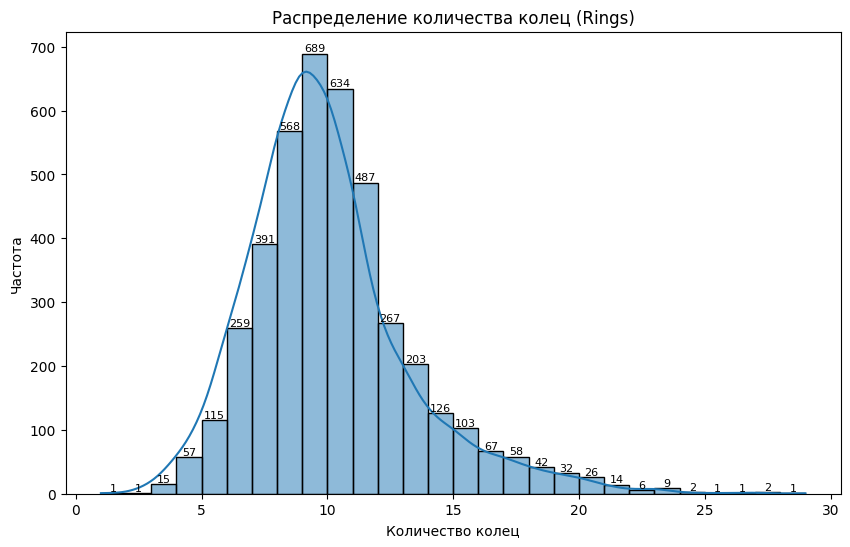

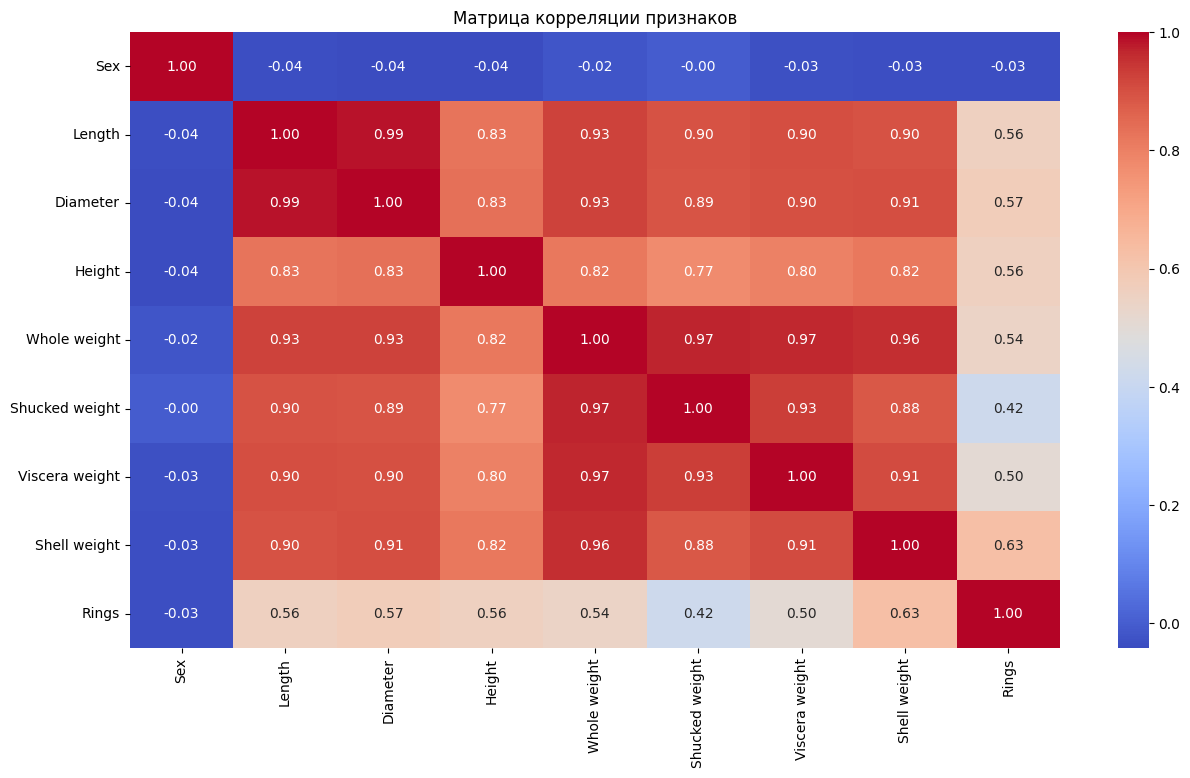

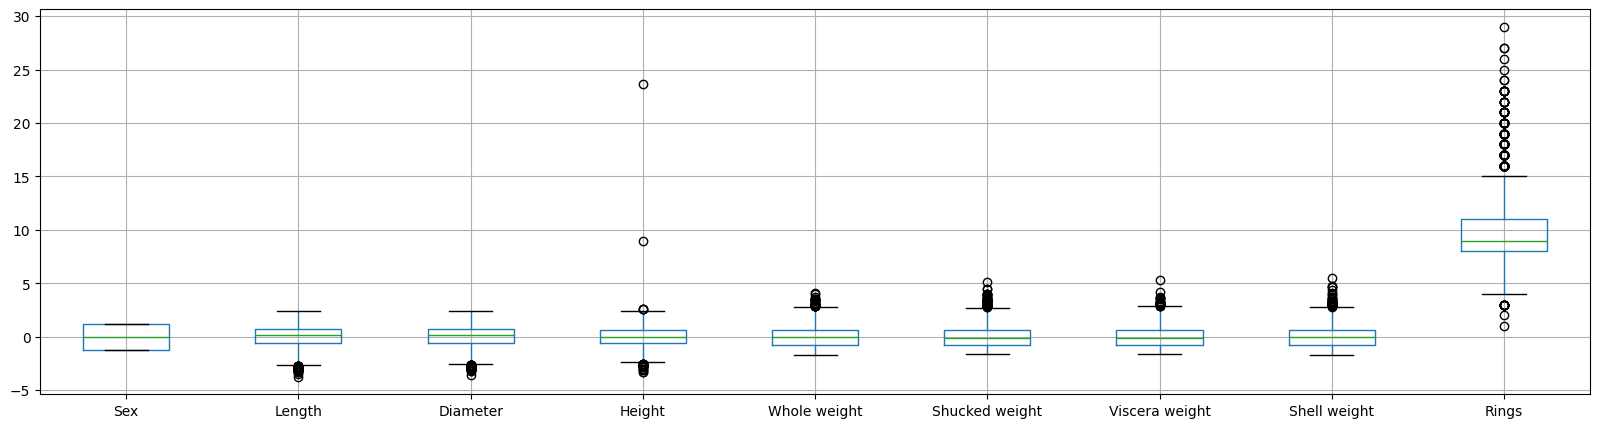

In [280]:
# Разведочный анализ данных (EDA)
if df is not None:
    value_counts = df['Rings'].value_counts().sort_index()
    print('value_counts: ', value_counts)
    # Распределение целевой переменной
    plt.figure(figsize=(10, 6))
    ax = sns.histplot(df['Rings'], bins=28, kde=True)
    plt.title('Распределение количества колец (Rings)')
    plt.xlabel('Количество колец')
    plt.ylabel('Частота')
    # Добавление подписей над столбцами
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',  # Значение высоты столбца (округляем до целого)
                    (p.get_x() + p.get_width() / 2., p.get_height()),  # Координаты для размещения текста
                    ha='center',  # Горизонтальное выравнивание
                    va='bottom',  # Вертикальное выравнивание
                    fontsize=8)  # Размер шрифта (можно настроить)
    plt.show()

    # Анализ корреляции
    plt.figure(figsize=(15, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Матрица корреляции признаков')
    plt.show()

    # Выявление выбросов
    df.boxplot( rot =0, figsize=(20,5))    

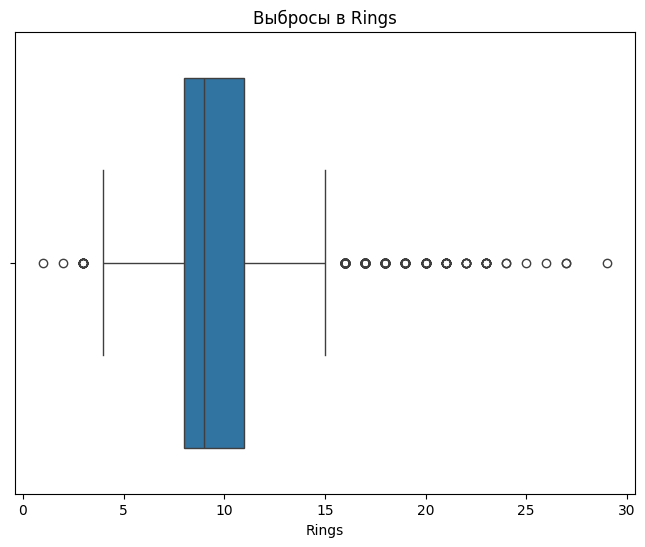

In [181]:
# Разведочный анализ данных (EDA)
if df is not None:
    # Выявление выбросов в Rings
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df['Rings'])
    plt.title('Выбросы в Rings')
    plt.show()

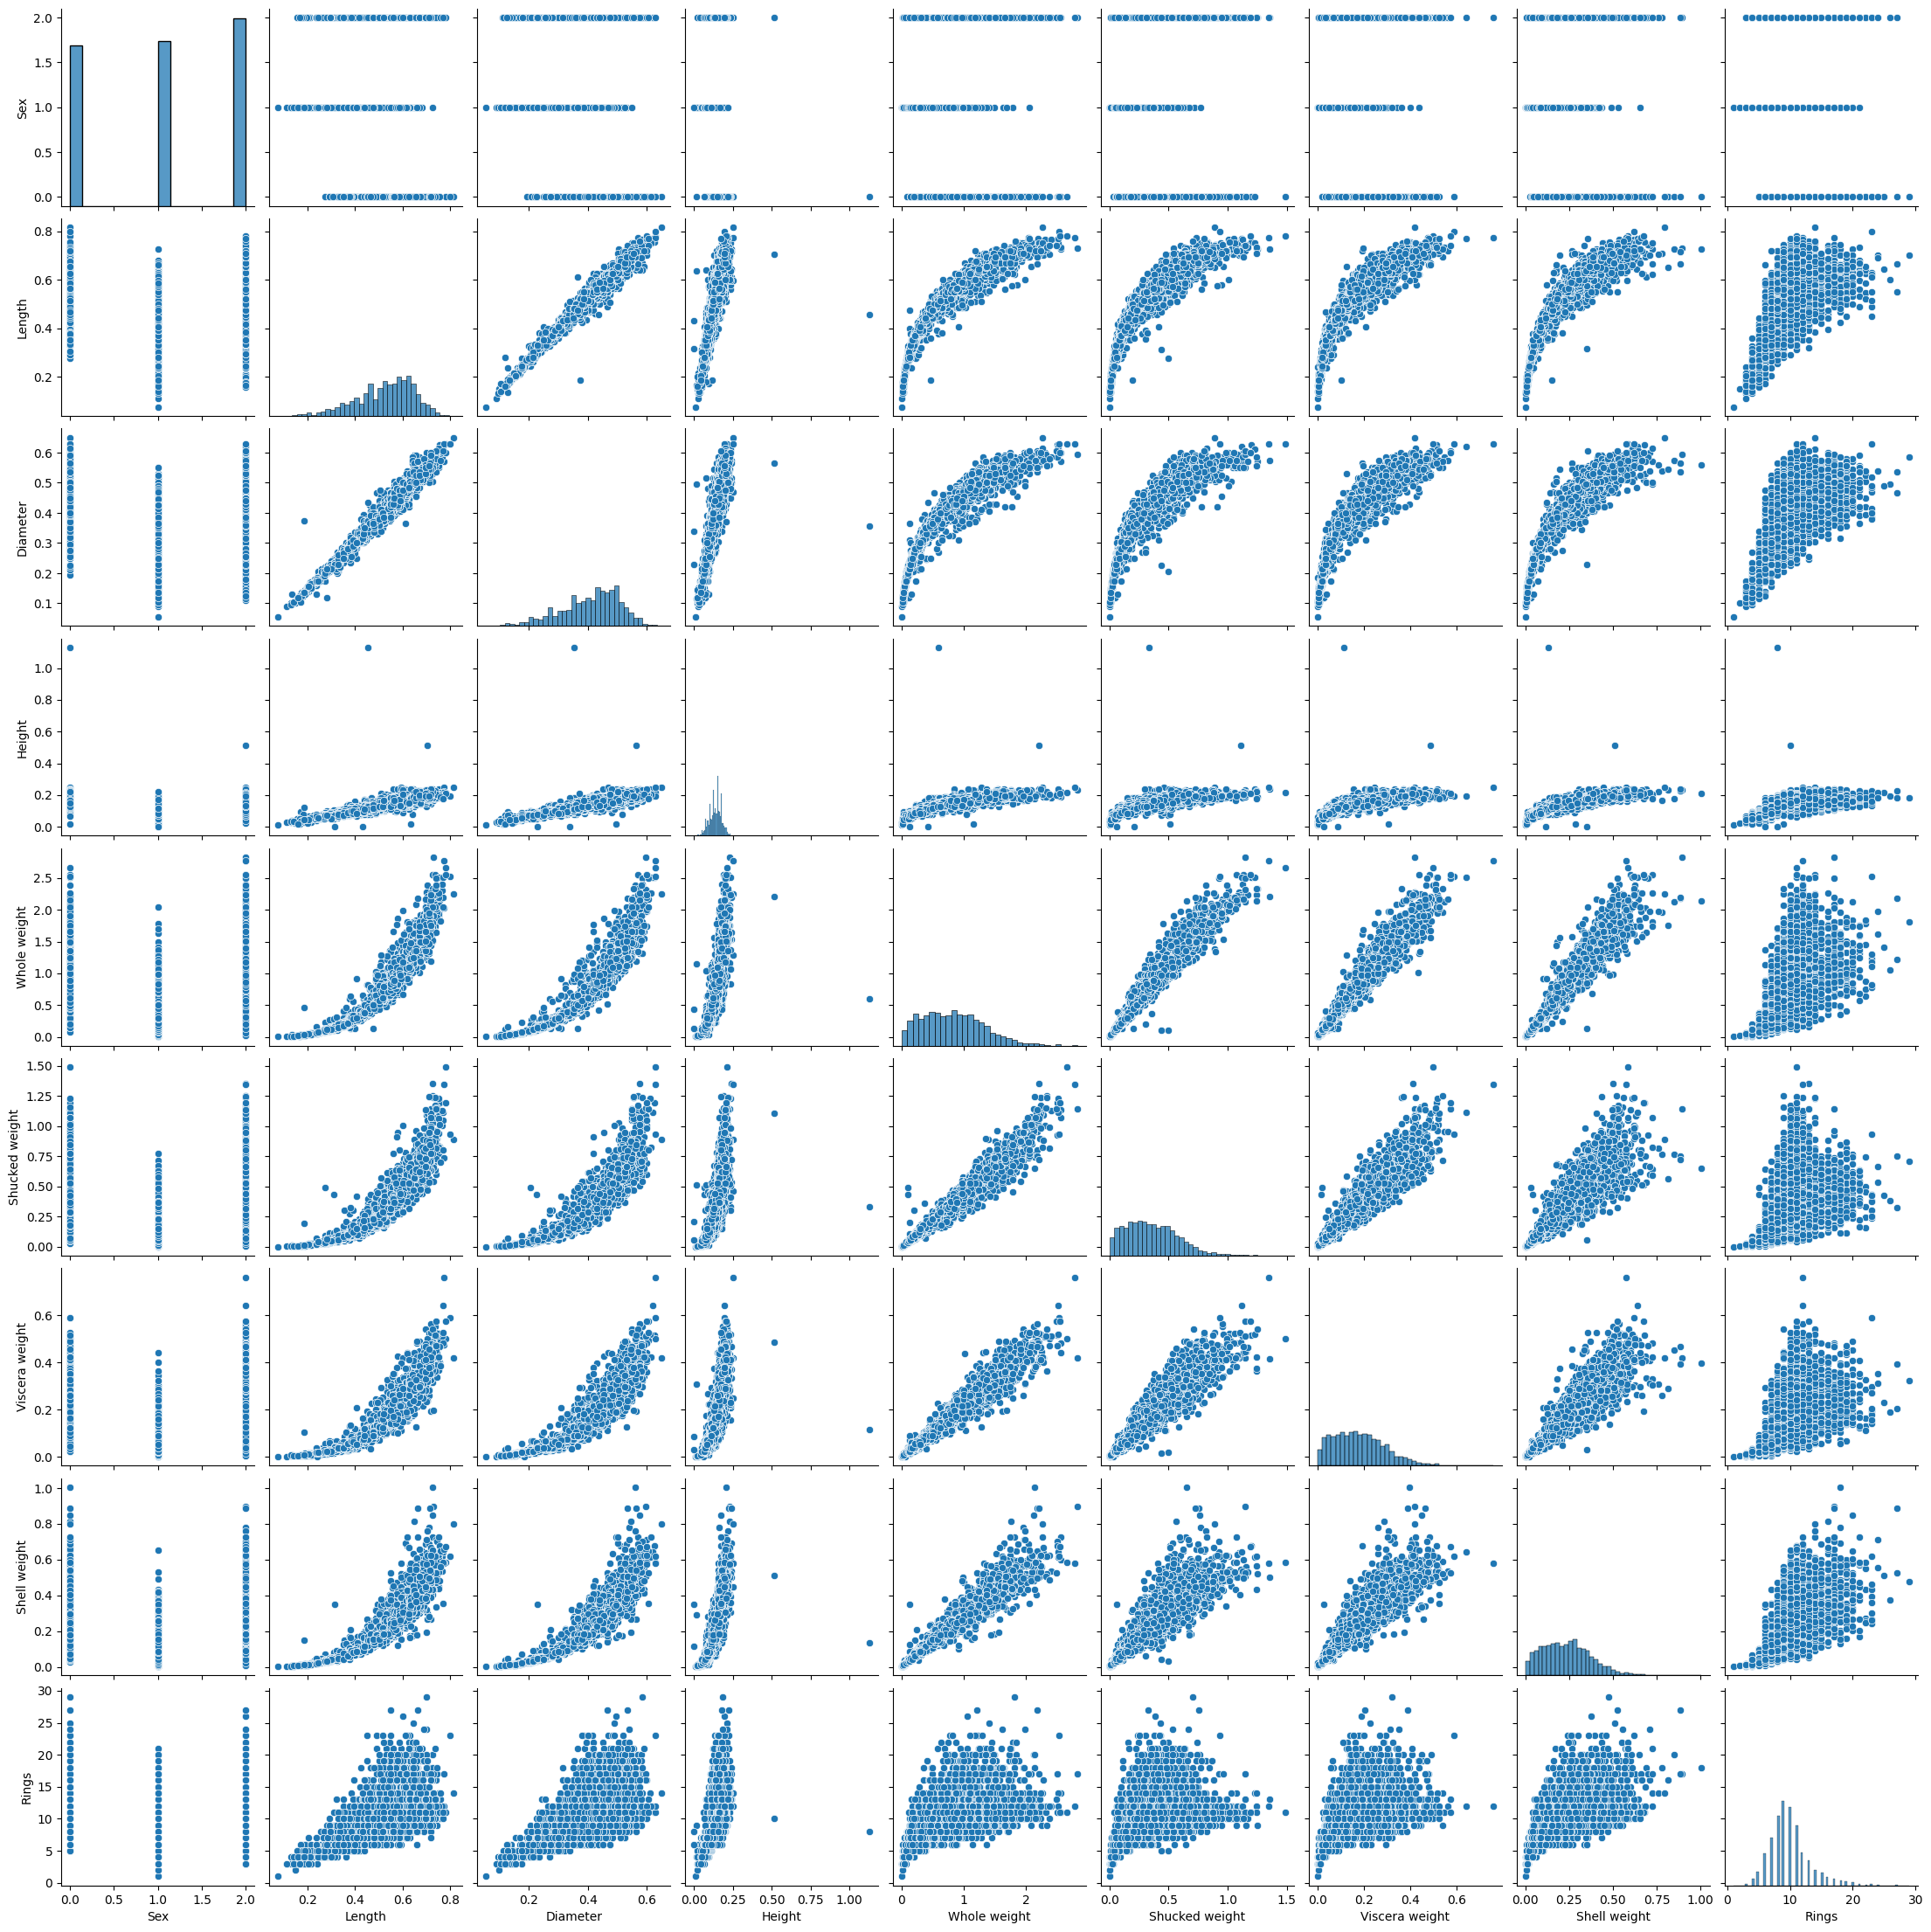

Время вывода: 9.59275770187378 сек


In [182]:
# Разведочный анализ данных (EDA)
if df is not None:
# Создание диаграммы рассеяния (pairplot) для анализа взаимосвязей между переменными в DataFrame.
# Визуализируем попарные отношения между численными столбцами в DataFrame `df`.
# На диагоналях отображаются гистограммы или оценки плотности распределения для каждой переменной.
# Вне диагонали отображаются диаграммы рассеяния для каждой пары переменных.
    start_time = time.time()
    sns.pairplot(df)
    plt.show()
    end_time = time.time()
    time_pr = end_time - start_time;
    print(f"Время вывода: {time_pr} сек")

In [183]:
print("ВЫВОДЫ после разведочного анализа данных (EDA)")
print("1. По матрице корреляции Diameter коррелирует с Length. нужно будет удалить Diametr")
print("2. Нужно удалить выбросы Rings")

ВЫВОДЫ после разведочного анализа данных (EDA)
1. По матрице корреляции Diametr коррелирует с Length. нужно будет удалить Diametr
2. Нужно удалить выбросы Rings


iqr_rings:  3.0
upper_bound: 15.5
lower_bound: 3.5
Исходный DataFrame: 
Информация о DataFrame:
                Sex        Length      Diameter        Height  Whole weight  \
count  4.177000e+03  4.177000e+03  4.177000e+03  4.177000e+03  4.177000e+03   
mean  -1.275813e-17 -5.834718e-16 -3.027929e-16  3.912493e-16  9.185853e-17   
std    1.000120e+00  1.000120e+00  1.000120e+00  1.000120e+00  1.000120e+00   
min   -1.280690e+00 -3.739154e+00 -3.556267e+00 -3.335953e+00 -1.686092e+00   
25%   -1.280690e+00 -6.161975e-01 -5.833158e-01 -5.862075e-01 -7.897577e-01   
50%   -6.435480e-02  1.749513e-01  1.725193e-01  1.156329e-02 -5.963767e-02   
75%    1.151980e+00  7.579031e-01  7.267984e-01  6.093341e-01  6.613049e-01   
max    1.151980e+00  2.423480e+00  2.440025e+00  2.368329e+01  4.072271e+00   

       Shucked weight  Viscera weight  Shell weight        Rings  
count    4.177000e+03    4.177000e+03  4.177000e+03  4177.000000  
mean    -1.020650e-17    2.704723e-16  2.976897e-16     9.

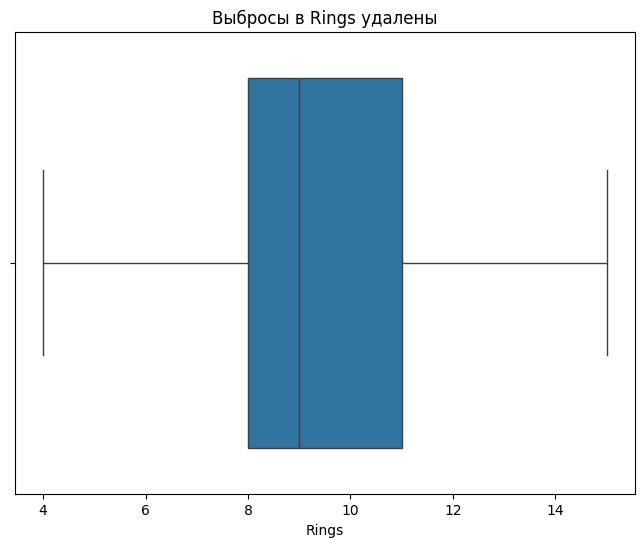

In [200]:
# удаляем выбросы в Rings
if df is not None:
    # Вычисляем квартили и IQR для столбца 'Rings'
    q1_rings = df['Rings'].quantile(0.25) # Первый квартиль (25-й процентиль)
    q3_rings = df['Rings'].quantile(0.75) # Третий квартиль (75-й процентиль)
    iqr_rings = q3_rings - q1_rings   # Межквартильный размах
    print("iqr_rings: ", iqr_rings)

    # Определяем границы для удаления выбросов (1.5 * IQR rule)
    lower_bound = q1_rings - 1.5 * iqr_rings
    upper_bound = q3_rings + 1.5 * iqr_rings
    print(f"upper_bound: {upper_bound}")
    print(f"lower_bound: {lower_bound}")

    # Фильтруем DataFrame, удаляя строки с выбросами
    df_clean = df[(df['Rings'] >= lower_bound) & (df['Rings'] <= upper_bound)].copy() # .copy() для избежания SettingWithCopyWarning
    
    print("Исходный DataFrame: ")
    df_info(df)

    # удаляем диаметр
    df_clean = df_clean.drop('Diameter', axis=1)
    print("Очищенный DataFrame: ")
    df_info(df_clean)

    print("Выбросы в Rings удалены")
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df_clean['Rings'])
    plt.title('Выбросы в Rings удалены')
    plt.show()

In [274]:
#Анализ значений колонки Rings на отсутствие некоторых  значений (пропуски в диапазоне)
import pandas as pd
def analyze_rings(df, column_name="Rings"):
    """
    Анализирует колонку "Rings" в DataFrame, ищет значения вне диапазона [1, 20]
    и собирает статистику по частоте встречаемости каждого значения.

    Args:
        df (pd.DataFrame): Входной DataFrame.
        column_name (str): Имя колонки с данными о кольцах (по умолчанию "Rings").

    Returns:
        tuple: Кортеж, содержащий:
            - pd.Series: Серию с частотой встречаемости каждого значения в колонке "Rings".
            - pd.Series: Серию с значениями вне диапазона [1, 20] (если такие есть) и их количеством.
    """

    # 1. Проверка на наличие колонки
    if column_name not in df.columns:
        raise ValueError(f"Колонка '{column_name}' не найдена в DataFrame.")

    # 2. Статистика по всем значениям
    value_counts = df[column_name].value_counts().sort_index()

    # 3. Поиск значений вне диапазона
    out_of_range = df[(df[column_name] < 1) | (df[column_name] > 20)][column_name]
    out_of_range_counts = out_of_range.value_counts()

    return value_counts, out_of_range_counts
    
try:
    value_counts, out_of_range_counts = analyze_rings(df)

    print("Частота встречаемости значений в колонке 'Rings':")
    print(value_counts)

    if not out_of_range_counts.empty:
        print("Значения вне диапазона [1, 20] и их количество:")
        print(out_of_range_counts)
    else:
        print("Значения вне диапазона [1, 20] не найдены.")

except ValueError as e:
    print(f"Ошибка: {e}")

Частота встречаемости значений в колонке 'Rings':
Rings
1       1
2       1
3      15
4      57
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
21     14
22      6
23      9
24      2
25      1
26      1
27      2
29      1
Name: count, dtype: int64
Значения вне диапазона [1, 20] и их количество:
Rings
21    14
23     9
22     6
27     2
24     2
26     1
29     1
25     1
Name: count, dtype: int64


In [202]:
# Предобработка данных: масштабирование числовых признаков
if df is not None:
    numerical_features = df_clean.select_dtypes(include=np.number).columns.tolist()
    numerical_features.remove('Rings')  #  Rings - целевая переменная
    
    # StandardScaler стандартизирует признаки, приводя их к нулевому среднему и единичной дисперсии.
    # Это важно для алгоритмов, чувствительных к масштабу данных (например, для градиентного бустинга).
    scaler = StandardScaler()
    df_clean[numerical_features] = scaler.fit_transform(df_clean[numerical_features])
    print("Числовые признаки масштабированы.")
    print(df_clean.head())

Числовые признаки масштабированы.
        Sex    Length    Height  Whole weight  Shucked weight  Viscera weight  \
0  1.157932 -0.551043 -1.035557     -0.608006       -0.585646       -0.697589   
1  1.157932 -1.433200 -1.156858     -1.206406       -1.146009       -1.179895   
2 -1.299758  0.079070 -0.065146     -0.269916       -0.442193       -0.325524   
3  1.157932 -0.677065 -0.307749     -0.603858       -0.625992       -0.578161   
4 -0.070913 -1.601230 -1.399461     -1.248927       -1.190838       -1.262576   

   Shell weight  Rings  
0     -0.604476     15  
1     -1.213621      7  
2     -0.147618      9  
3     -0.566405     10  
4     -1.327835      7  


In [204]:
# Разделение данных
def split_data(df, target_column='Rings', test_size=0.2, random_state=42):
    """
    Разделяет данные на обучающий и тестовый наборы.

    Args:
        df (pandas.DataFrame): Входной DataFrame.
        target_column (str): Название целевой переменной.
        test_size (float): Размер тестового набора (доля).
        random_state (int):  Для воспроизводимости результатов.

    Returns:
        tuple: Кортеж, содержащий разделенные наборы данных (X_train, X_test, y_train, y_test).
    """
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test
    
if df is not None:
    X_train, X_test, y_train, y_test = split_data(df_clean)
    print("Данные разделены на обучающий и тестовый наборы.")
    print(f"Размер обучающего набора: {X_train.shape}")
    print(f"Размер тестового набора: {X_test.shape}")
    print(f"Тип y_train: {type(y_train)}") # Проверяем тип
    print(f"Тип y_test: {type(y_test)}") # Проверяем тип

Данные разделены на обучающий и тестовый наборы.
Размер обучающего набора: (3119, 7)
Размер тестового набора: (780, 7)
Тип y_train: <class 'pandas.core.series.Series'>
Тип y_test: <class 'pandas.core.series.Series'>


------------------------------------------------------------
Обучение и оценка модели: Линейная регрессия
Время обучения: 0.0033483505249023438 сек
Время расчета метрик: 0.005984306335449219 сек
------------------------------------------------------------
Обучение и оценка модели: Регрессия на основе ExtraTrees
Время обучения: 0.8296961784362793 сек
Время расчета метрик: 0.08477544784545898 сек
------------------------------------------------------------
Обучение и оценка модели: Дерево решений
Время обучения: 0.018948078155517578 сек
Время расчета метрик: 0.0049877166748046875 сек
------------------------------------------------------------
Обучение и оценка модели: Случайный лес
Время обучения: 1.398456335067749 сек
Время расчета метрик: 0.0738377571105957 сек
------------------------------------------------------------
Обучение и оценка модели: Градиентный бустинг
Время обучения: 0.4967324733734131 сек
Время расчета метрик: 0.011936426162719727 сек
----------------------------------

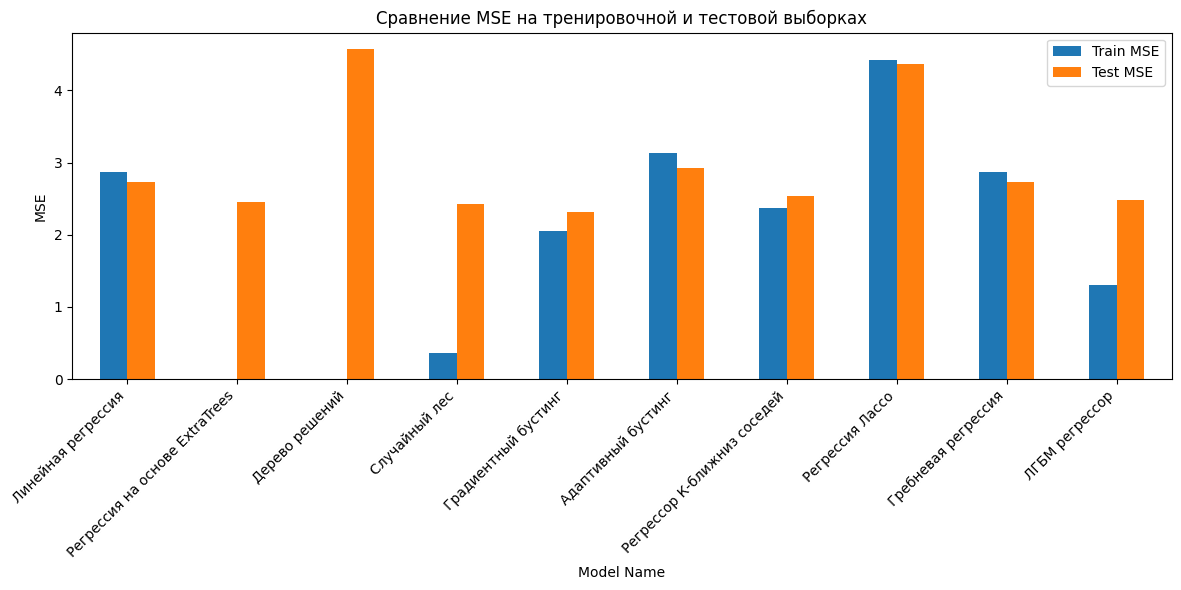

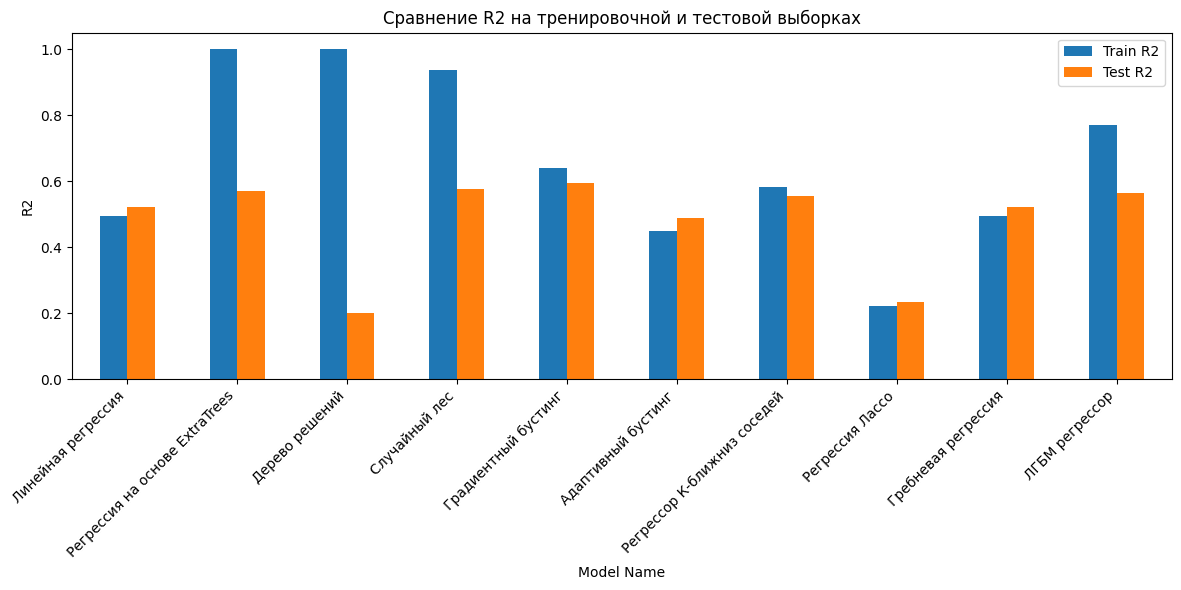

In [205]:
# Выбор и обучение моделей
models = {
    "Линейная регрессия":LinearRegression(),
    "Регрессия на основе ExtraTrees": ExtraTreesRegressor(random_state=42),
    "Дерево решений": DecisionTreeRegressor(random_state=42),
    "Случайный лес": RandomForestRegressor(random_state=42),
    "Градиентный бустинг": GradientBoostingRegressor(random_state=42),
    "Адаптивный бустинг": AdaBoostRegressor(random_state=42),
    "Регрессор К-ближниз соседей": KNeighborsRegressor(n_neighbors=19),
    "Регрессия Лассо":Lasso(),
    "Гребневая регрессия":Ridge(),
    "ЛГБМ регрессор":LGBMRegressor()
}

def train_and_evaluate_model(model_name, model, X_train, y_train, X_test, y_test):
    """
    Обучает и оценивает модель, возвращает метрики и время обучения.
    """
    print("-" * 60)
    print(f"Обучение и оценка модели: {model_name}")
    
    start_time = time.time()  
    model.fit(X_train, y_train)
    end_time = time.time() 
    training_time = end_time - start_time
    print(f"Время обучения: {training_time} сек")

    start_time = time.time()
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Расчет метрик
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    end_time = time.time()
    metric_time = end_time - start_time;
    print(f"Время расчета метрик: {metric_time} сек")

    return {
        "Model Name": model_name,
        "Train MSE": train_mse,
        "Test MSE": test_mse,
        "Train MAE": train_mae,
        "Test MAE": test_mae,
        "Train R2": train_r2,
        "Test R2": test_r2,
        "Training Time (sec)": training_time,
        "Metric Calculation Time (sec)": metric_time,
    }

# Вывод результатов
def print_results(results):
    """
    Выводит результаты обучения моделей.
    """
    results_df = pd.DataFrame(results)
    print("-" * 30, " Результаты обучения и оценки моделей ", "-" * 30)
    print(results_df.to_string(index=False))  
    print("-" * 100)
    
        
# Визуализация результатов
def plot_results(results):
    """
    Визуализирует результаты обучения моделей.
    """
    if not results:
        print("Нет результатов для визуализации.")
        return

    metrics_df = pd.DataFrame(results)
    try:
        metrics_df.plot(
            x="Model Name", y=["Train MSE", "Test MSE"], kind="bar", figsize=(12, 6),
            title="Сравнение MSE на тренировочной и тестовой выборках",
        )
        plt.ylabel("MSE")
        plt.xticks(rotation=45, ha="right")  # Поворачиваем подписи оси X
        plt.tight_layout()  # Улучшаем компоновку графика
        plt.show()

        metrics_df.plot(
            x="Model Name", y=["Train R2", "Test R2"], kind="bar", figsize=(12, 6),
            title="Сравнение R2 на тренировочной и тестовой выборках",
        )
        plt.ylabel("R2")
        plt.xticks(rotation=45, ha="right")  # Поворачиваем подписи оси X
        plt.tight_layout()  # Улучшаем компоновку графика
        plt.show()
    except KeyError as e:
        print(f"Ошибка при построении графика: {e}. Проверьте названия столбцов.")
        print("Доступные столбцы:", metrics_df.columns.tolist())  # Выводим доступные столбцы


results = []

if "models" in locals():
    for name, model in models.items():
        results.append(
            train_and_evaluate_model(name, model, X_train, y_train, X_test, y_test)
        )

    if results:  # Проверяем, что результаты не пустые
        print_results(results) # Вызываем функцию вывода результатов
        plot_results(results)  # Вызываем функцию визуализации
    else:
        print("Нет моделей для обучения.")
else:
    print("Переменная 'models' не определена.")

In [215]:
# Лучшие метрики показывает Градиентный бустинг
# Оценка модели с использованием кросс-валидации для GradientBoostingRegressor
if df is not None:
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    model = GradientBoostingRegressor(random_state=42)  # Создаем модель градиентного бустинга
    gb_cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='r2')  # Используем R2 для оценки
    print("Оценка модели GradientBoostingRegressor с кросс-валидацией:")
    print(f"  R2 (кросс-валидация): {gb_cv_scores.mean():.2f} +/- {gb_cv_scores.std():.2f}")

Оценка модели GradientBoostingRegressor с кросс-валидацией:
  R2 (кросс-валидация): 0.55 +/- 0.02


In [208]:
# Хотим улучшить метрики
# Создаем и обучаем модель
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)  # Обучаем на масштабированных данных
y_pred = model.predict(X_test)  # Делаем предсказания на тестовых данных

# Вычисление метрик качества
# Mean Absolute Error.
# MAE показывает, насколько в среднем  предсказания ошибаются, не обращая внимания на направление ошибки (больше или меньше)
mae = mean_absolute_error(y_test, y_pred)

# Mean Squared Error.
# MSE показывает насколько в среднем прогнозы модели отклоняются от реальных значений в квадрате.
# Берем каждую ошибку (разницу между предсказанным и реальным значением), возводим ее в квадрат,
# а затем находим среднее значение всех этих квадратов.
# MSE более чувствителен к большим ошибкам, чем MAE, потому что ошибки возводятся в квадрат.
# Это значит, что большие ошибки оказывают большее влияние на значение MSE.
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error
# Это просто квадратный корень из MSE.
# RMSE возвращает нас к той же единице измерения, что и целевая переменная (в нашем случае — возраст),
# что делает его более понятным и интерпретируемым. RMSE также чувствителен к большим ошибкам, как и MSE.
rmse = np.sqrt(mse)

# R-squared
# R2 показывает какая доля дисперсии целевых значений объясняется моделью.
# Это коэффициент детерминации, который показывает, какую долю вариации в целевой переменной (в нашем случае — возрасте) можно объяснить моделью.
# Значение R2 варьируется от 0 до 1. 
# Если R2 близок к 1, это означает, что модель хорошо объясняет вариацию в данных. 
# Если R2 = 0, это означает, что модель плохо объясняет данные. Модель будет плохо работать с неизвестным набором данных.
# Прогнозы модели соответствуют среднему арифметическому фактических целевых значений;
# Если R2 < 0, то модель работает хуже, чем простое использование среднего значения фактических целевых значений
# (обычно это связано с тем, что модель обучалась на данных, в которые попали большие выбросы)
r2 = r2_score(y_test, y_pred)

# Выводим результаты
print("-" * 30)
print(f'Метрики качества:')
print("-" * 30)
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

------------------------------
Метрики качества:
------------------------------
MAE: 1.1700
MSE: 2.3120
RMSE: 1.5205
R²: 0.5952


In [209]:
# Получаем гиперпараметры по умолчанию
default_params = model.get_params()

# Выводим гиперпараметры
print(f"Гиперпараметры по умолчанию для GradientBoostingRegressor:")
for param, value in default_params.items():
    print(f"{param}: {value}")

Гиперпараметры по умолчанию для Gradient Boosting:
alpha: 0.9
ccp_alpha: 0.0
criterion: friedman_mse
init: None
learning_rate: 0.1
loss: squared_error
max_depth: 3
max_features: None
max_leaf_nodes: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
n_estimators: 100
n_iter_no_change: None
random_state: 42
subsample: 1.0
tol: 0.0001
validation_fraction: 0.1
verbose: 0
warm_start: False


In [216]:
# Настройка гиперпараметров для GradientBoostingRegressor
if df is not None:
    
    # Определение гиперпараметров для GradientBoostingRegressor
    gb_params = {
        'n_estimators': [50, 100, 200] ,  # Количество деревьев [50, 100, 200] 
        'learning_rate': [0.01, 0.1, 0.2],  # Скорость обучения
        'max_depth': [1, 3, 5],  # Максимальная глубина деревьев  [1, 3, 5]
        'min_samples_split': [2, 5, 10],  # Минимальное количество образцов для разделения
        'min_samples_leaf': [1, 2, 4],  # Минимальное количество образцов в листе
        'subsample':  [0.8, 0.9, 1.0]  # Доля образцов для обучения каждого дерева  [0.8, 0.9, 1.0]
    } 

    model = GradientBoostingRegressor(random_state=42)
    grid_search = GridSearchCV(model, gb_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    print("Результаты Grid Search для GradientBoostingRegressor:")
    print(f"  Лучшие параметры: {grid_search.best_params_}")
    print(f"  Лучший RMSE: {np.sqrt(-grid_search.best_score_):.2f}")

    # Обучение модели с лучшими параметрами на всем обучающем наборе
    best_gb_model = grid_search.best_estimator_
    best_gb_predictions = best_gb_model.predict(X_test)
    best_gb_rmse = np.sqrt(mean_squared_error(y_test, best_gb_predictions))
    best_gb_r2 = r2_score(y_test, best_gb_predictions)
    print("Оценка модели GradientBoostingRegressor с лучшими параметрами на тестовом наборе:")
    print(f"  RMSE: {best_gb_rmse:.2f}")
    print(f"  R^2: {best_gb_r2:.2f}")

Результаты Grid Search для GradientBoostingRegressor:
  Лучшие параметры: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50, 'subsample': 0.8}
  Лучший RMSE: 1.60
Оценка модели GradientBoostingRegressor с лучшими параметрами на тестовом наборе:
  RMSE: 1.52
  R^2: 0.59


In [217]:
# Сравниваем гиперпараметры
best_params = grid_search.best_params_

# Создаем DataFrame для удобного сравнения гиперпараметров: по умолчанию и найденных лучших
params_comparison = pd.DataFrame({
    'Parameter': default_params.keys(),
    'Default Value': default_params.values(),
    'Best Value': [best_params.get(param, 'N/A') for param in default_params.keys()]
})

# Выводим таблицу
print(params_comparison)

                   Parameter  Default Value Best Value
0                      alpha            0.9        N/A
1                  ccp_alpha            0.0        N/A
2                  criterion   friedman_mse        N/A
3                       init           None        N/A
4              learning_rate            0.1        0.1
5                       loss  squared_error        N/A
6                  max_depth              3          5
7               max_features           None        N/A
8             max_leaf_nodes           None        N/A
9      min_impurity_decrease            0.0        N/A
10          min_samples_leaf              1          2
11         min_samples_split              2          5
12  min_weight_fraction_leaf            0.0        N/A
13              n_estimators            100         50
14          n_iter_no_change           None        N/A
15              random_state             42        N/A
16                 subsample            1.0        0.8
17        

In [218]:
# Инициализируем модель с лучшими гиперпараметрами
y_pred2 = best_gb_predictions

# Вычисляем метрики для второй модели
mae2 = mean_absolute_error(y_test, y_pred2)
mse2 = mean_squared_error(y_test, y_pred2)
rmse2 = np.sqrt(mse2)
r22 = r2_score(y_test, y_pred2)

# Создаем DataFrame для сравнения метрик
metrics = {
    'Metric': ['MAE', 'MSE', 'RMSE', 'R²'],
    'Model Deafult Params': [mae, mse, rmse, r2],
    'Model Best Params': [mae2, mse2, rmse2, r22]
}

metrics_df = pd.DataFrame(metrics)

# Выводим таблицу
print(metrics_df)

  Metric  Model Deafult Params  Model Best Params
0    MAE              1.169979           1.165815
1    MSE              2.311980           2.321077
2   RMSE              1.520520           1.523508
3     R²              0.595192           0.593599


feature_importances:  [0.03399904 0.03824849 0.05622968 0.0482759  0.12365891 0.05075558
 0.6488324 ]
feature_names:  Index(['Sex', 'Length', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight'],
      dtype='object')


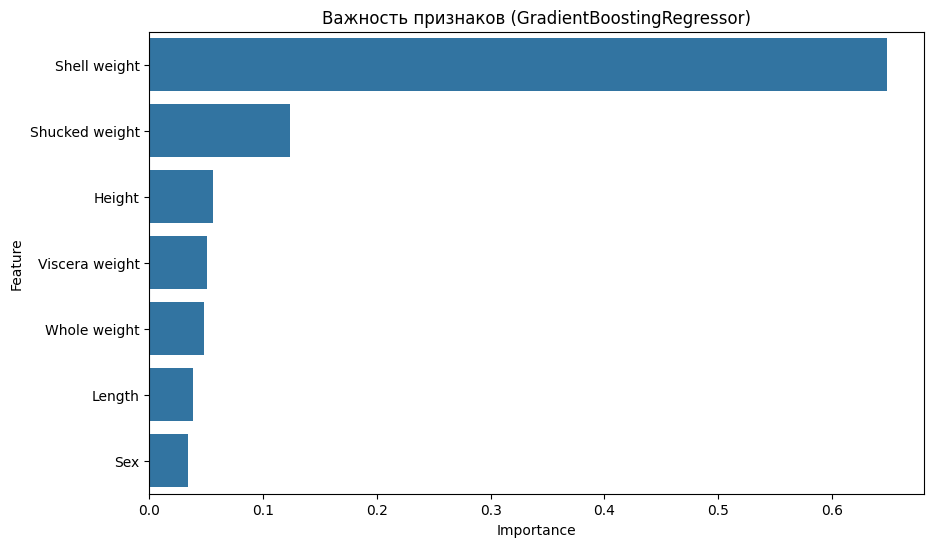

In [223]:
# Анализ важности признаков (для лучшей модели - GradientBoostingRegressor)
if df is not None:
    if 'best_gb_model' in locals():
        feature_importances = best_gb_model.feature_importances_
        print("feature_importances: ", feature_importances)
        feature_names = X_train.columns
        print("feature_names: ", feature_names)
        feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
        feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
        plt.title('Важность признаков (GradientBoostingRegressor)')
        plt.show()
    else:
        print("Модель RandomForestRegressor с лучшими параметрами не обучена.")

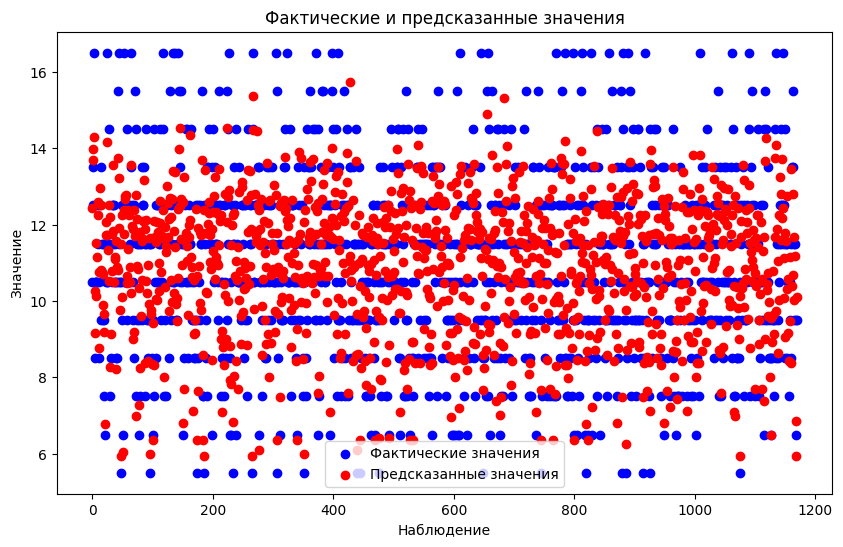

In [27]:
# Визуализация предсказанных и фактических значений
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Фактические значения')
plt.scatter(range(len(y_test)), y_pred, color='red', label='Предсказанные значения')
plt.xlabel('Наблюдение')
plt.ylabel('Значение')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()

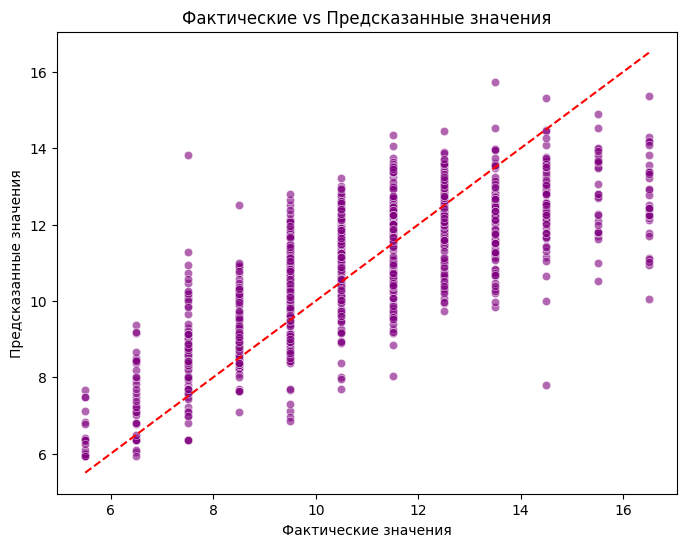

In [165]:
#Визуализация предсказанных и фактических значений
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='purple', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Фактические vs Предсказанные значения')
plt.show()

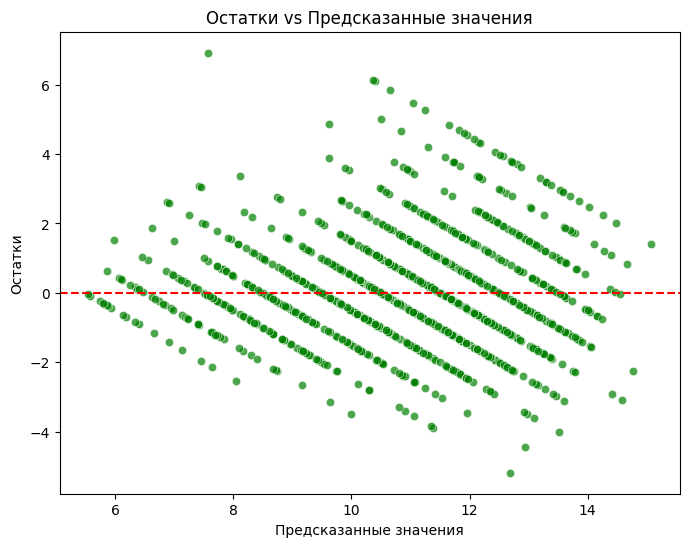

In [170]:
#Остатки vs Предсказанные значения
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, color='green', alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('Остатки vs Предсказанные значения')
plt.show()

In [225]:
from sklearn.preprocessing import PolynomialFeatures

In [226]:
# Добавление полиномиальных признаков

poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

In [228]:
# Создание и обучение модели
model = GradientBoostingRegressor(random_state=42)
model.fit(X_poly_train, y_train)
y_pred = model.predict(X_poly_test)

In [229]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("-" * 30)
print(f'Метрики качества:')
print("-" * 30)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")



------------------------------
Метрики качества:
------------------------------
MAE: 1.1823699884504735
MSE: 2.3544166865343805
R²: 0.5877618134661781


In [ ]:

"""

Были исследованы различные модели регрессии для предсказания количества колец у абалонов
Модели показывают невысокие значения R2 в диапозоне от 0.5-0.6 (есть ниже около 0.3) 

GradientBoostingRegressor показал наилучшие результаты 
Применение гиперпараметров,крос-валидации для модели с лучшими метриками Gradient Boosting Regressor не улучшело R2  ни на 1 %
Добавление полиномиальных признаков в  регрессии не улучшело R2
оптимизация модели не дает значимых результатов
"""